In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nx, Ny = 51,26  # Uniform grid
Lx=1.0          # m
Ly=0.5          # m
# Allocate temperature field
T = np.zeros((Nx, Ny))
alpha= 1.0e-4  #Thermal diffusivity m**2/s
# Dirichlet boundary conditions
def apply_dirichlet_bc(T):
    T[0, :]  = 0.0# left edge
    T[-1, :] = 0.0# right edge
    T[:, 0]  = 0.0# bottom edge
    T[:, -1] = 0.0# top edge (nonzero to drive the solution)



# Object in this coordinate system
    # dx= Lx / (Nx - 1)=1/50=0.02 => 0.45/0.02=22.5 and 0.55/0.02=27.5
    # dy = Ly / (Ny - 1)=0.5/25=0.02 => 0.2/0.02=10 and 0.3/0.02=15
dx= Lx / (Nx - 1)
dy = Ly /(Ny - 1)

# chose ∆t. Since alpha*∆t*((1/dx)**2+(1/dy)**2)<or=0.5 <=> ∆t < or = 1 
ne=0.5/(alpha*((1/dx)**2+(1/dy)**2))
# 2D FTCS stability condition
dt=0.5
# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5
# Create physical coordinate arrays (optional but recommended)
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")
print('Task 1')
print('n=', n)
print('dx=', dx)
print('dy=', dy)
print('dt < or = to n so dt=',dt)

Task 1


NameError: name 'n' is not defined

In [3]:
# Initial condition: heated patch
heated_patch = (X >= 0.45) & (X <= 0.55) & (Y >= 0.20) & (Y <= 0.30)
T[heated_patch] = 100.0
apply_dirichlet_bc(T)

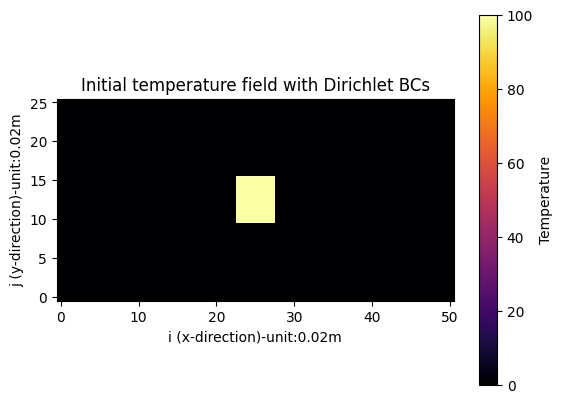

In [4]:
plt.figure()
plt.imshow(T.T, origin="lower", cmap="inferno")
plt.colorbar(label="Temperature")
plt.title("Initial temperature field with Dirichlet BCs")
plt.xlabel("i (x-direction)-unit:0.02m")
plt.ylabel("j (y-direction)-unit:0.02m")
plt.show()

In [5]:
# Gauss–Seidel parameters
max_iter = 500
tol = 1e-6

for n in range(max_iter):
    max_change = 0.0

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            Told = T[i, j] 

            # FTCS 
            T[i, j] = Told + alpha*dt * ((T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +(T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2)
            T[heated_patch] = 100.0

            max_change = max(max_change, abs(T[i, j] - Told))

    #  Dirichlet BC
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0

    if max_change < tol:
        print(f"Converged in {it+1} iterations")
        break


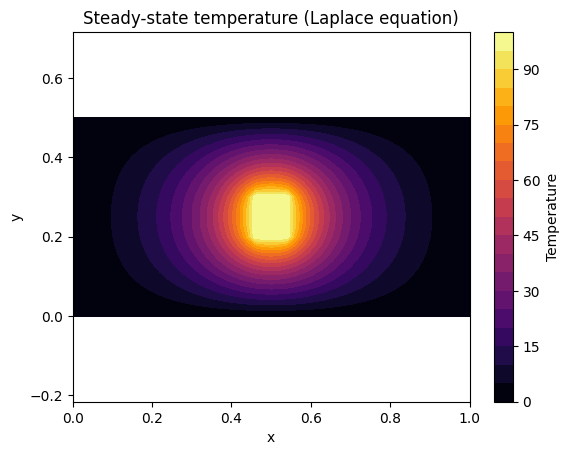

Tmax at t=0 = 100.0


In [6]:
# Contour plot of steady-state solution
plt.figure()
cs = plt.contourf(X, Y, T, levels=20, cmap="inferno")
plt.colorbar(cs, label="Temperature")
plt.title("Steady-state temperature (Laplace equation)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()
print("Tmax at t=0 =", T.max())

Tmax at t=10s = 60.36647371853193


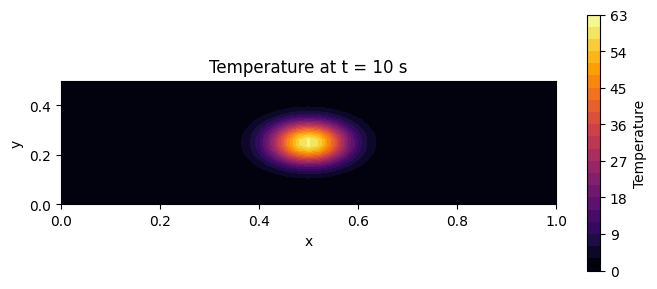

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Nx, Ny = 51,26  # Uniform grid
Lx=1.0          # m
Ly=0.5          # m
# Allocate temperature field
T = np.zeros((Nx, Ny))
alpha= 1.0e-4  #Thermal diffusivity m**2/s
# Dirichlet boundary conditions
def apply_dirichlet_bc(T):
    T[0, :]  = 0.0# left edge
    T[-1, :] = 0.0# right edge
    T[:, 0]  = 0.0# bottom edge
    T[:, -1] = 0.0# top edge (nonzero to drive the solution)



# Object in this coordinate system
    # dx= Lx / (Nx - 1)=1/50=0.02 => 0.45/0.02=22.5 and 0.55/0.02=27.5
    # dy = Ly / (Ny - 1)=0.5/25=0.02 => 0.2/0.02=10 and 0.3/0.02=15
dx= Lx / (Nx - 1)
dy = Ly /(Ny - 1)

# chose ∆t. Since alpha*∆t*((1/dx)**2+(1/dy)**2)<or=0.5 <=> ∆t < or = 1 
ne=0.5/(alpha*((1/dx)**2+(1/dy)**2))
# 2D FTCS stability condition
dt=0.5
# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5
# Create physical coordinate arrays (optional but recommended)
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")
# Initial condition: heated patch
heated_patch = (X >= 0.45) & (X <= 0.55) & (Y >= 0.20) & (Y <= 0.30)
T[heated_patch] = 100.0
apply_dirichlet_bc(T)
# Times 10s
t_10s = 10.0
nsteps = int(round(t_10s / dt))

for n in range(nsteps):
    Tn = T.copy()  

    # FTCS update
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = Tn[i, j] + alpha * dt * ((Tn[i+1, j] - 2*Tn[i, j] + Tn[i-1, j]) / dx**2 +(Tn[i, j+1] - 2*Tn[i, j] + Tn[i, j-1]) / dy**2)

    # Dirichlet BC
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0

print("Tmax at t=10s =", T.max())
plt.figure(figsize=(7,3))
cs = plt.contourf(X, Y, T, levels=20, cmap="inferno")
plt.colorbar(cs, label="Temperature")
plt.title("Temperature at t = 10 s")
plt.xlabel("x"); plt.ylabel("y")
plt.gca().set_aspect(Ly/Lx)
plt.tight_layout()
plt.show()


Tmax at t=50s = 17.66456636027486


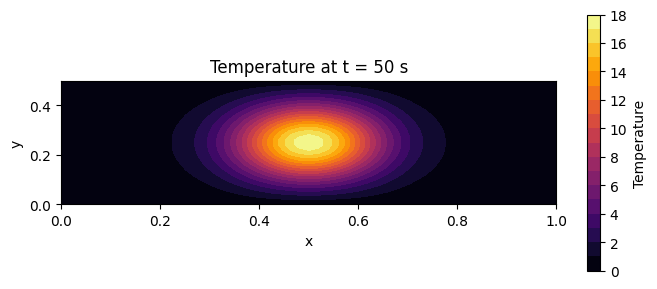

In [8]:
import numpy as np
import matplotlib.pyplot as plt
Nx, Ny = 51,26  # Uniform grid
Lx=1.0          # m
Ly=0.5          # m
# Allocate temperature field
T = np.zeros((Nx, Ny))
alpha= 1.0e-4  #Thermal diffusivity m**2/s
# Dirichlet boundary conditions
def apply_dirichlet_bc(T):
    T[0, :]  = 0.0# left edge
    T[-1, :] = 0.0# right edge
    T[:, 0]  = 0.0# bottom edge
    T[:, -1] = 0.0# top edge (nonzero to drive the solution)



# Object in this coordinate system
    # dx= Lx / (Nx - 1)=1/50=0.02 => 0.45/0.02=22.5 and 0.55/0.02=27.5
    # dy = Ly / (Ny - 1)=0.5/25=0.02 => 0.2/0.02=10 and 0.3/0.02=15
dx= Lx / (Nx - 1)
dy = Ly /(Ny - 1)

# chose ∆t. Since alpha*∆t*((1/dx)**2+(1/dy)**2)<or=0.5 <=> ∆t < or = 1 
ne=0.5/(alpha*((1/dx)**2+(1/dy)**2))
# 2D FTCS stability condition
dt=0.5
# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5
# Create physical coordinate arrays (optional but recommended)
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")
# Initial condition: heated patch
heated_patch = (X >= 0.45) & (X <= 0.55) & (Y >= 0.20) & (Y <= 0.30)
T[heated_patch] = 100.0
apply_dirichlet_bc(T)
# Times 50s
t_50s = 50.0
nsteps = int(round(t_50s / dt))

for n in range(nsteps):
    Tn = T.copy()  

    # FTCS update
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = Tn[i, j] + alpha * dt * ((Tn[i+1, j] - 2*Tn[i, j] + Tn[i-1, j]) / dx**2 +(Tn[i, j+1] - 2*Tn[i, j] + Tn[i, j-1]) / dy**2)

    # Dirichlet BC
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0

print("Tmax at t=50s =", T.max())
plt.figure(figsize=(7,3))
cs = plt.contourf(X, Y, T, levels=20, cmap="inferno")
plt.colorbar(cs, label="Temperature")
plt.title("Temperature at t = 50 s")
plt.xlabel("x"); plt.ylabel("y")
plt.gca().set_aspect(Ly/Lx)
plt.tight_layout()
plt.show()


Tmax at t=200s = 3.2962384689800923


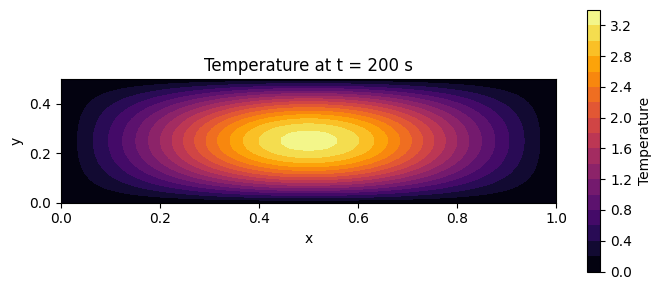

End of task2


In [9]:
# Times 200s
t_200s = 200.0
nsteps = int(round(t_200s / dt))

for n in range(nsteps):
    Tn = T.copy()  

    # FTCS update
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = Tn[i, j] + alpha * dt * ((Tn[i+1, j] - 2*Tn[i, j] + Tn[i-1, j]) / dx**2 +(Tn[i, j+1] - 2*Tn[i, j] + Tn[i, j-1]) / dy**2)

    # Dirichlet BC
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0

print("Tmax at t=200s =", T.max())
plt.figure(figsize=(7,3))
cs = plt.contourf(X, Y, T, levels=20, cmap="inferno")
plt.colorbar(cs, label="Temperature")
plt.title("Temperature at t = 200 s")
plt.xlabel("x"); plt.ylabel("y")
plt.gca().set_aspect(Ly/Lx)
plt.tight_layout()
plt.show()
print("End of task2")

Task 3


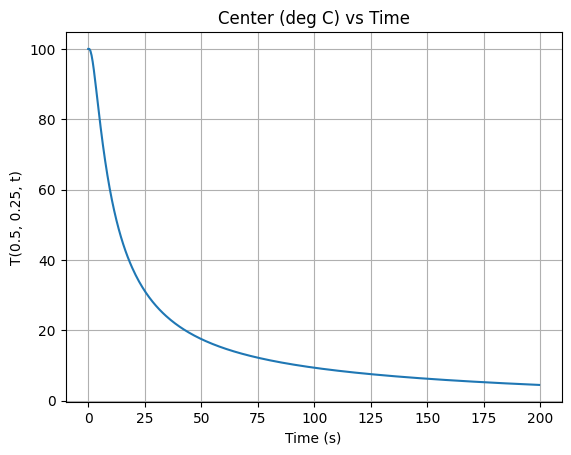

In [10]:
print('Task 3')
import numpy as np
import matplotlib.pyplot as plt
Nx, Ny = 51,26  # Uniform grid
Lx=1.0          # m
Ly=0.5          # m
# Allocate temperature field
T = np.zeros((Nx, Ny))
alpha= 1.0e-4  #Thermal diffusivity m**2/s
# Dirichlet boundary conditions
def apply_dirichlet_bc(T):
    T[0, :]  = 0.0# left edge
    T[-1, :] = 0.0# right edge
    T[:, 0]  = 0.0# bottom edge
    T[:, -1] = 0.0# top edge (nonzero to drive the solution)

apply_dirichlet_bc(T)
dt=0.5
t_200s = 200.0
nsteps = int(round(t_200s / dt))
# Object in this coordinate system
    # dx= Lx / (Nx - 1)=1/50=0.02 => 0.45/0.02=22.5 and 0.55/0.02=27.5
    # dy = Ly / (Ny - 1)=0.5/25=0.02 => 0.2/0.02=10 and 0.3/0.02=15
dx= Lx / (Nx - 1)
dy = Ly /(Ny - 1)
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")
# chose ∆t. Since alpha*∆t*((1/dx)**2+(1/dy)**2)<or=0.5 <=> ∆t < or = 1 
n=0.5/(alpha*((1/dx)**2+(1/dy)**2))


# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5
# Initial condition: heated patch
heated_patch = (X >= 0.45) & (X <= 0.55) & (Y >= 0.20) & (Y <= 0.30)
T[heated_patch] = 100.0
apply_dirichlet_bc(T)
# Center point
i_center = int(round(0.5 / dx))
j_center = int(round(0.25 / dy))

T_center_hist = []
t_hist = []

# Time loop
for n in range(nsteps):

    Tn = T.copy()

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = Tn[i, j] + alpha * dt * ((Tn[i+1, j] - 2*Tn[i, j] + Tn[i-1, j]) / dx**2 +(Tn[i, j+1] - 2*Tn[i, j] + Tn[i, j-1]) / dy**2)

    # Dirichlet BC
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0

    # Record center temperature
    T_center_hist.append(T[i_center, j_center])
    t_hist.append(n * dt)

# Plot
plt.figure()
plt.plot(t_hist, T_center_hist)
plt.xlabel("Time (s)")
plt.ylabel("T(0.5, 0.25, t)")
plt.title("Center (deg C) vs Time")
plt.grid(True)
plt.show()
threshold = 10.0   # degrees C
t10 = None         # initialize


In [11]:
import numpy as np
import matplotlib.pyplot as plt
Nx, Ny = 51,26  # Uniform grid
Lx=1.0          # m
Ly=0.5          # m
# Allocate temperature field
T = np.zeros((Nx, Ny))
alpha= 1.0e-4  #Thermal diffusivity m**2/s
# Dirichlet boundary conditions
def apply_dirichlet_bc(T):
    T[0, :]  = 0.0# left edge
    T[-1, :] = 0.0# right edge
    T[:, 0]  = 0.0# bottom edge
    T[:, -1] = 0.0# top edge (nonzero to drive the solution)



# Object in this coordinate system
    # dx= Lx / (Nx - 1)=1/50=0.02 => 0.45/0.02=22.5 and 0.55/0.02=27.5
    # dy = Ly / (Ny - 1)=0.5/25=0.02 => 0.2/0.02=10 and 0.3/0.02=15
dx= Lx / (Nx - 1)
dy = Ly /(Ny - 1)

# chose ∆t. Since alpha*∆t*((1/dx)**2+(1/dy)**2)<or=0.5 <=> ∆t < or = 1 
ne=0.5/(alpha*((1/dx)**2+(1/dy)**2))
# 2D FTCS stability condition
dt=0.5
# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5
# Create physical coordinate arrays (optional but recommended)
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")
# Initial condition: heated patch
heated_patch = (X >= 0.45) & (X <= 0.55) & (Y >= 0.20) & (Y <= 0.30)
T[heated_patch] = 100.0
apply_dirichlet_bc(T)
t_final = 200.0
nsteps = int(t_final / dt)
output_times = [0, 10, 50, 200]
saved_fields = {}
# Center index
i_center = int(round(0.5 / dx))
j_center = int(round(0.25 / dy))

# Time storage
T_center_hist = []
Tmax_hist = []
t_hist = []
for n in range(nsteps + 1):

    t = n * dt

    # Save contour fields at requested times
    for ot in output_times:
        if abs(t - ot) < dt:saved_fields[ot] = T.copy()

    # Record histories
    T_center_hist.append(T[i_center, j_center])
    Tmax_hist.append(T.max())
    t_hist.append(t)

    # Skip update on final iteration
    if n == nsteps:
        break

    Tn = T.copy()

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = Tn[i, j] + alpha * dt * (
                (Tn[i+1, j] - 2*Tn[i, j] + Tn[i-1, j]) / dx**2 +
                (Tn[i, j+1] - 2*Tn[i, j] + Tn[i, j-1]) / dy**2
            )

    # Dirichlet boundary conditions
    T[0, :]  = 0.0
    T[-1, :] = 0.0
    T[:, 0]  = 0.0
    T[:, -1] = 0.0
threshold = 10.0
t10 = None

for n in range(len(Tmax_hist)):
    if Tmax_hist[n] <= threshold:
        t10 = t_hist[n]
        break

if t10 is None:
    print("Tmax never dropped below 10°C in simulation window.")
else:
    print(f"t_10% = {t10:.6f} seconds")   

t_10% = 94.000000 seconds
